In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import missingno as msno
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("/kaggle/input/jodiac/complaints.csv")  # Replace with actual file path
df.head()


<ipython-input-2-9c6393b6edfe>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/jodiac/complaints.csv")  # Replace with actual file path


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
2,2025-01-29,"Payday loan, title loan, personal loan, or adv...",Installment loan,Problem when making payments,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,FL,33055,NaN,NaN,Phone,2025-02-04,In progress,Yes,NaN,11824206
3,2025-01-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Resurgent Capital Services L.P.,NC,27455,NaN,NaN,Postal mail,2025-01-27,In progress,Yes,NaN,11799137
4,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2025-01-28,In progress,Yes,NaN,11810502


In [3]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column types and missing values
df.info()

# Summary statistics
df.describe(include="all")


Dataset contains 7848317 rows and 18 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848317 entries, 0 to 7848316
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
d

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,7848317,7848317,7613022,7848311,7032655,2515449,3914723,7848317,7797014,7818089,582534,6421660,7848317,7848317,7848297,7848317,768306,7.848317e+06
unique,4829,21,86,178,272,1874070,11,7539,63,34511,3,4,7,4778,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-01-17,Closed with explanation,Yes,No,NaN
freq,32862,3255674,5382512,2684928,1715049,18963,3629886,1796532,1005190,151796,357061,3583523,7267972,28438,4657074,7782970,619928,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.969995e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.237025e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.110928e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.337147e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.744908e+06


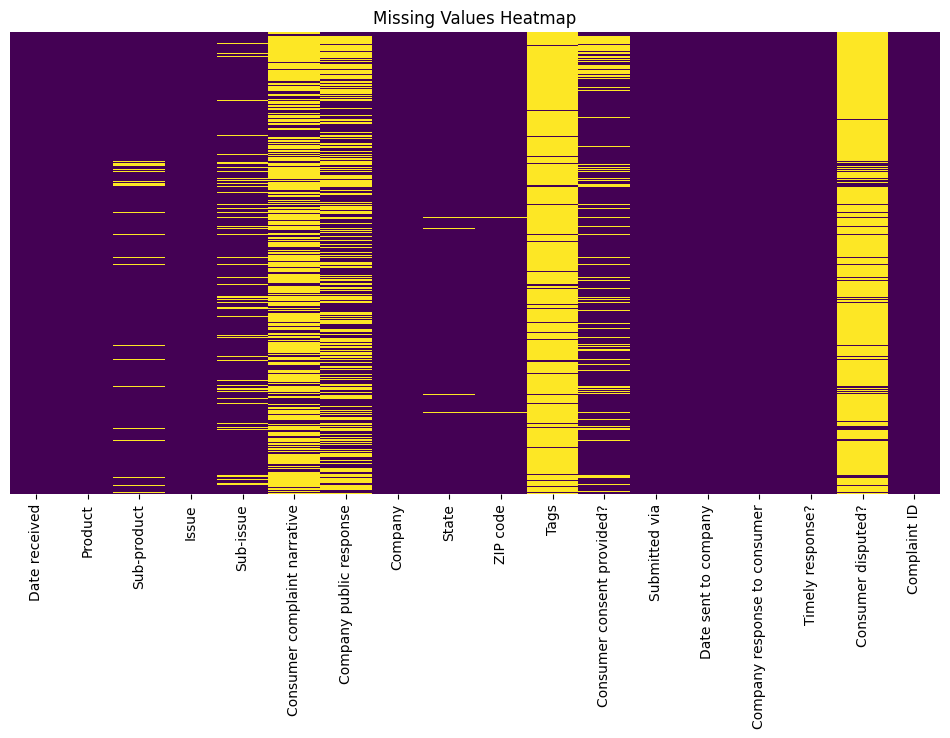

                              Missing Values  Percentage
Tags                                 7265783   92.577593
Consumer disputed?                   7080011   90.210564
Consumer complaint narrative         5332868   67.949192
Company public response              3933594   50.120223
Consumer consent provided?           1426657   18.177872
Sub-issue                             815662   10.392827
Sub-product                           235295    2.998031
State                                  51303    0.653682
ZIP code                               30228    0.385153
Company response to consumer              20    0.000255
Issue                                      6    0.000076
Date received                              0    0.000000
Product                                    0    0.000000
Company                                    0    0.000000
Date sent to company                       0    0.000000
Submitted via                              0    0.000000
Timely response?               

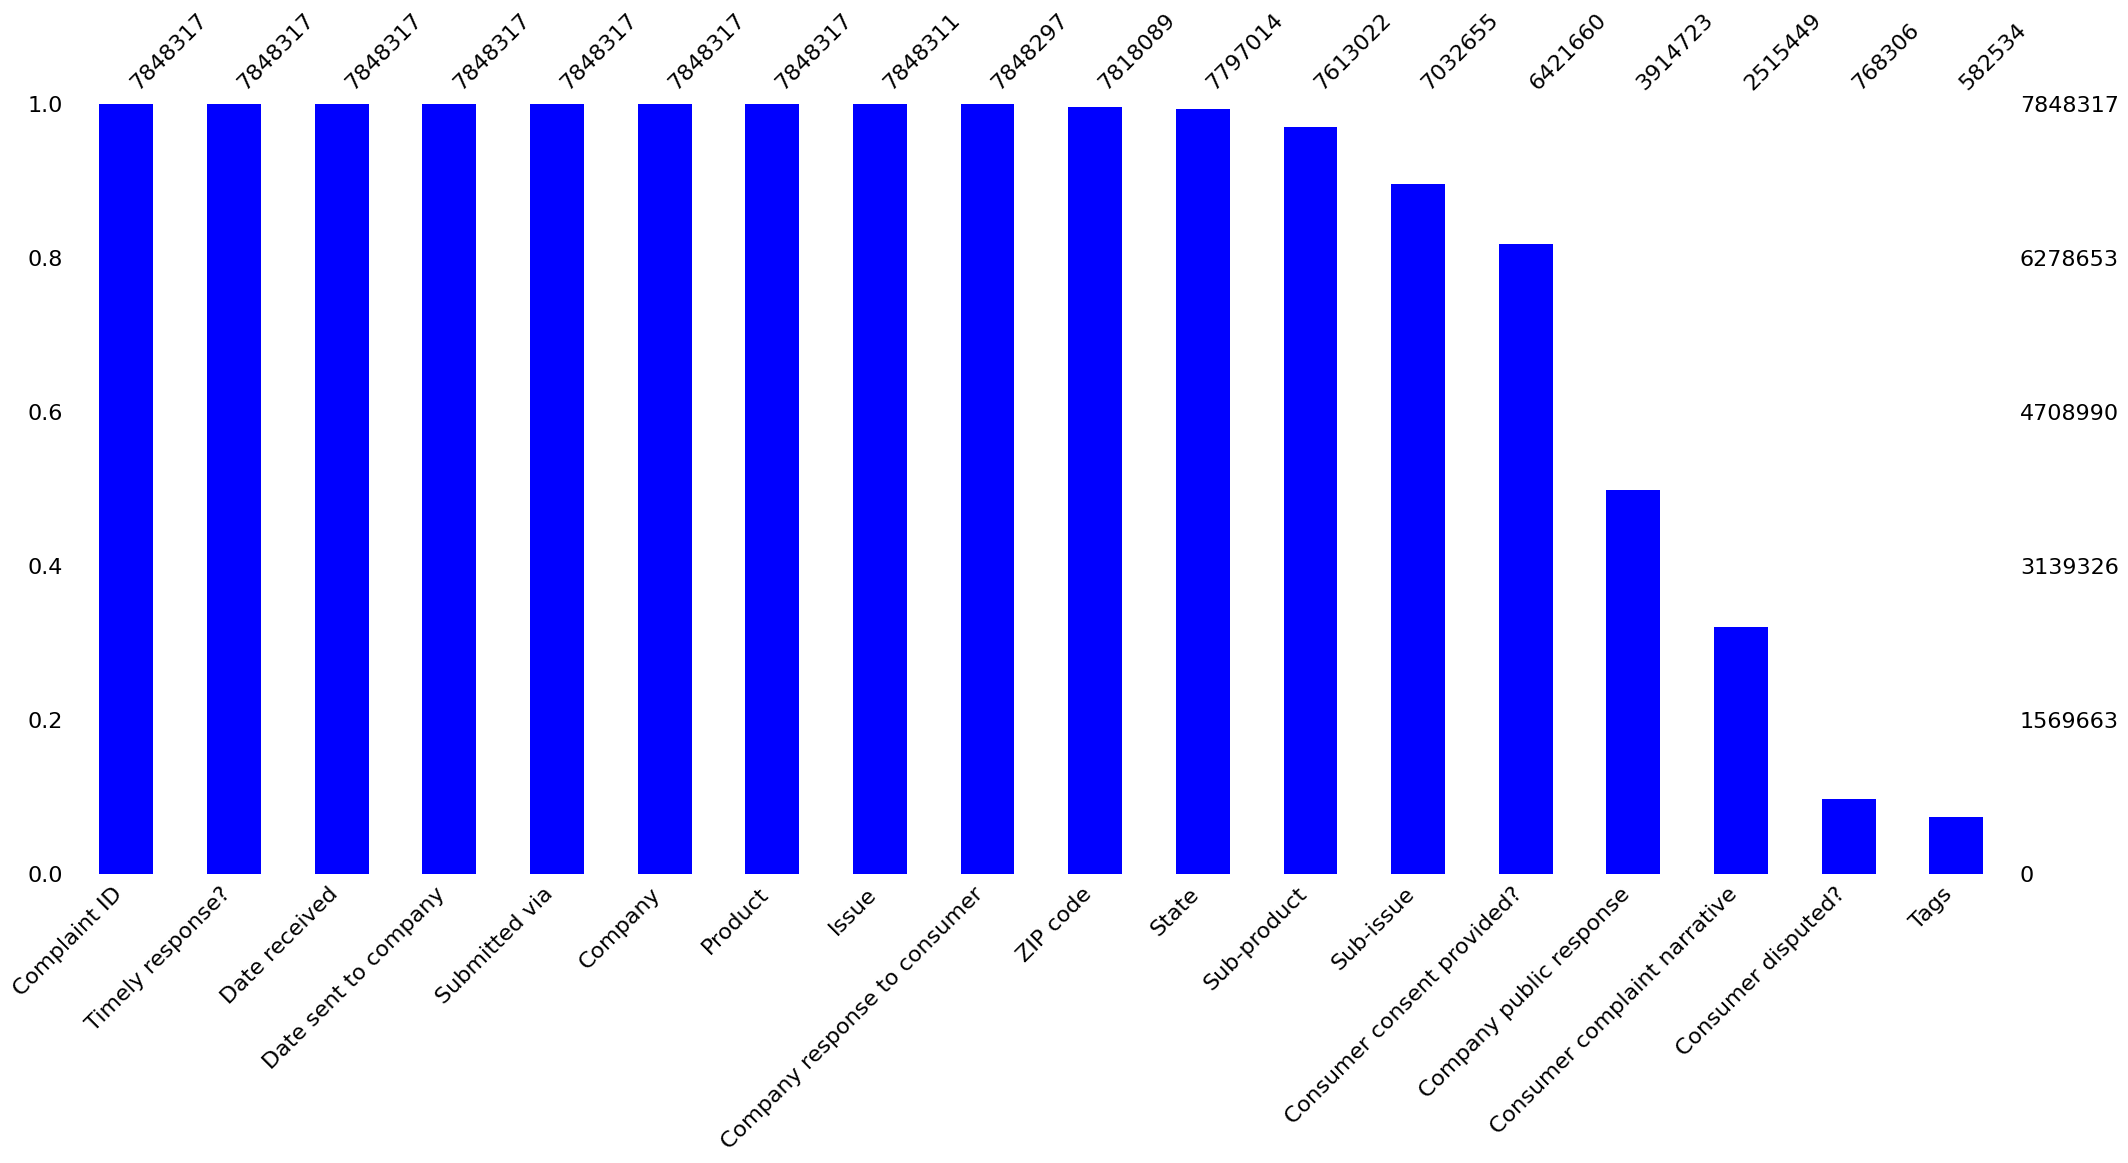

In [4]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Missing values count
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_df)

# Alternative visualization
msno.bar(df, color="blue", sort="descending")
plt.show()


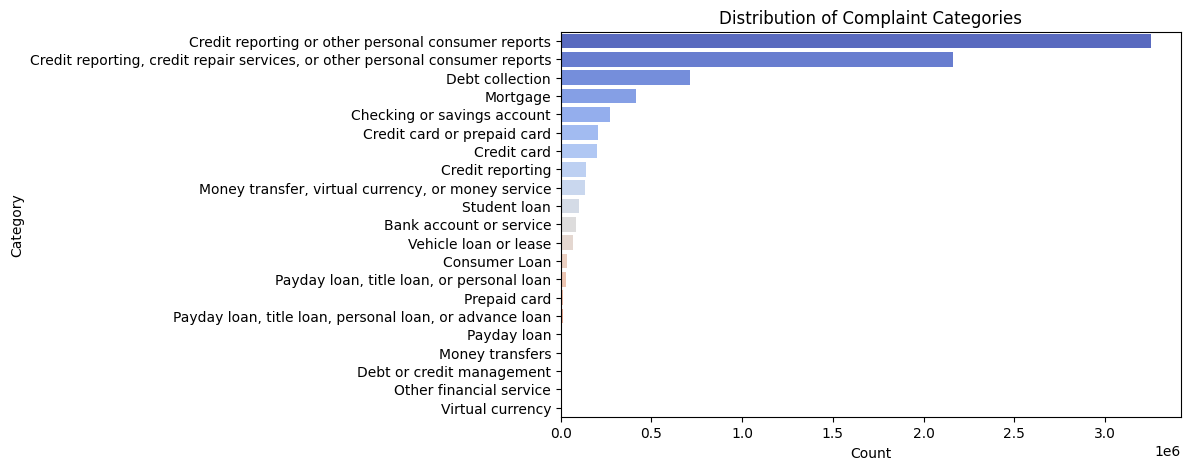

Product
Credit reporting or other personal consumer reports                             41.482448
Credit reporting, credit repair services, or other personal consumer reports    27.571058
Debt collection                                                                  9.070811
Mortgage                                                                         5.283986
Checking or savings account                                                      3.432379
Credit card or prepaid card                                                      2.629506
Credit card                                                                      2.520209
Credit reporting                                                                 1.789288
Money transfer, virtual currency, or money service                               1.669173
Student loan                                                                     1.275445
Bank account or service                                                          1.098388
Ve

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Product"], order=df["Product"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Complaint Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Print class distribution
print(df["Product"].value_counts(normalize=True) * 100)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


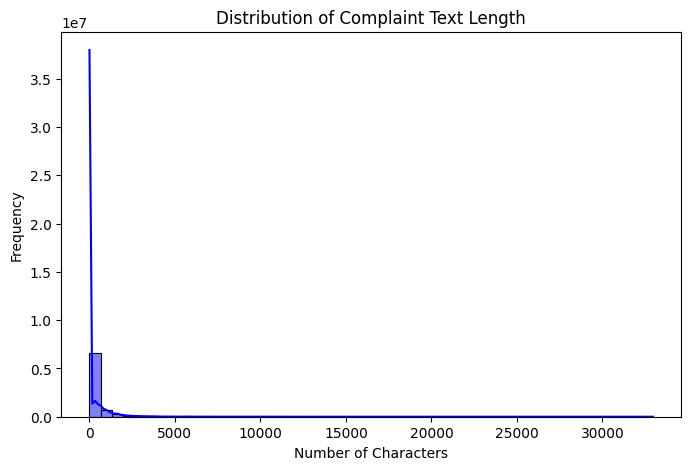

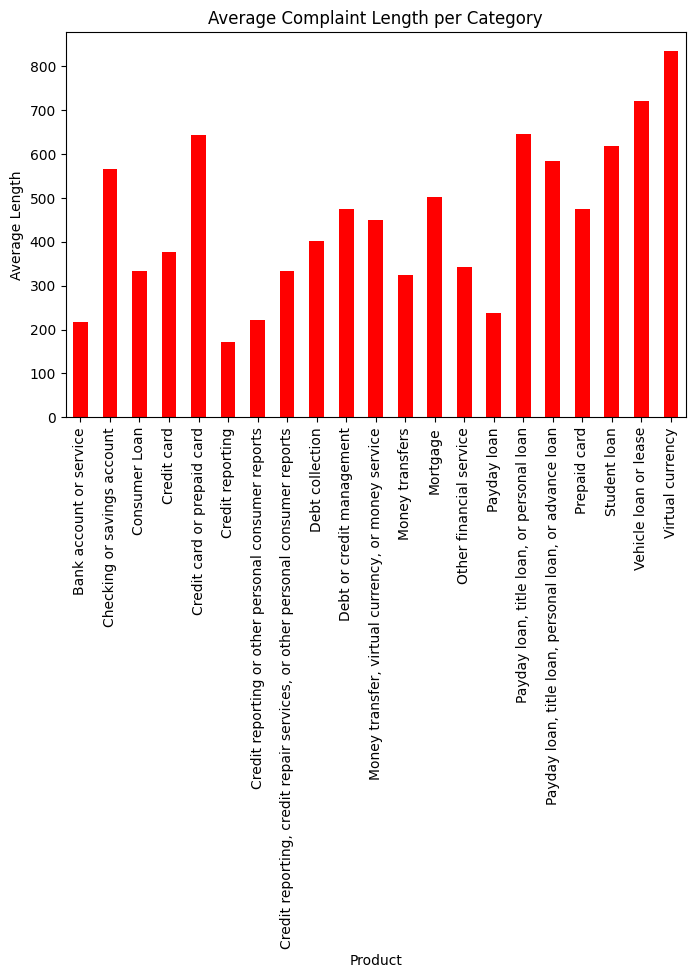

In [6]:
df["Text_Length"] = df["Consumer complaint narrative"].astype(str).apply(len)

# Histogram of text length
plt.figure(figsize=(8, 5))
sns.histplot(df["Text_Length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Complaint Text Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Average text length per category
df.groupby("Product")["Text_Length"].mean().plot(kind="bar", color="red", figsize=(8, 5))
plt.title("Average Complaint Length per Category")
plt.ylabel("Average Length")
plt.show()


In [7]:
# Drop rows where 'Consumer complaint narrative' is null
df = df.dropna(subset=["Consumer complaint narrative"]).reset_index(drop=True)

# Check if null values are removed
print(df.isnull().sum())  # Should show 0 nulls in 'Consumer complaint narrative'


Date received                         0
Product                               0
Sub-product                       52206
Issue                                 0
Sub-issue                        241821
Consumer complaint narrative          0
Company public response         1155214
Company                               0
State                              9210
ZIP code                              0
Tags                            2235223
Consumer consent provided?            0
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              2351438
Complaint ID                          0
Text_Length                           0
dtype: int64


Starting text preprocessing...


Processing Complaints: 100%|██████████| 2515449/2515449 [01:03<00:00, 39768.86it/s]


Text preprocessing completed.
Counting word frequencies...


Counting Words: 100%|██████████| 2515449/2515449 [00:40<00:00, 61804.41it/s]


Generating word frequency plot...


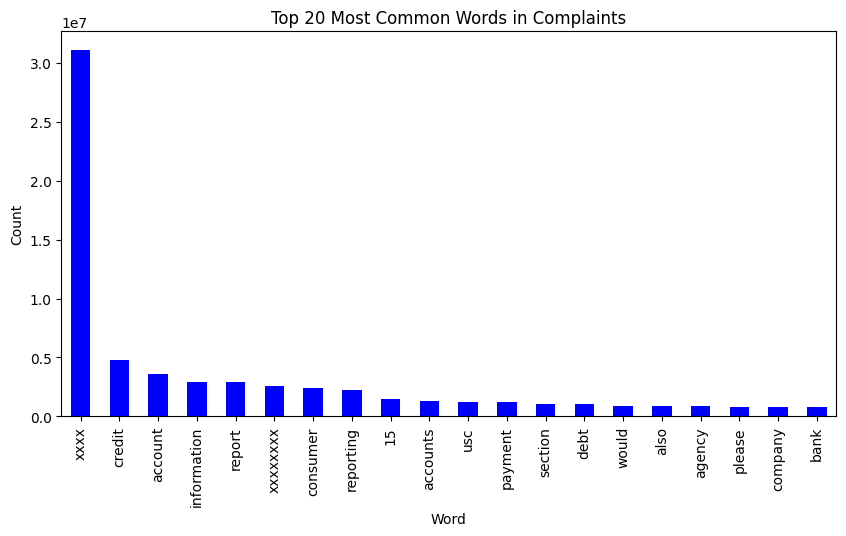

Word frequency visualization complete.


In [8]:
stop_words = set(stopwords.words("english"))
from collections import Counter
from tqdm import tqdm

def preprocess_text_fast(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])  # Remove stopwords

# Apply preprocessing with TQDM progress bar
print("Starting text preprocessing...")
tqdm.pandas(desc="Processing Complaints")
df["Clean_Text"] = df["Consumer complaint narrative"].astype(str).str.lower()  # Lowercase all
df["Clean_Text"] = df["Clean_Text"].str.replace(r"[^\w\s]", "", regex=True)  # Remove punctuation
df["Clean_Text"] = df["Clean_Text"].progress_apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))  # Remove stopwords
print("Text preprocessing completed.")

# Create a word frequency dictionary with progress
print("Counting word frequencies...")
word_freq = Counter()  # Initialize empty counter
for text in tqdm(df["Clean_Text"], desc="Counting Words"):
    word_freq.update(text.split())  # Update counter with words in each row

# Plot most common words
print("Generating word frequency plot...")
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=["Word", "Count"])
common_words_df.set_index("Word").plot(kind="bar", color="blue", legend=False, figsize=(10, 5))
plt.title("Top 20 Most Common Words in Complaints")
plt.ylabel("Count")
plt.show()
print("Word frequency visualization complete.")

Generating word cloud efficiently...


Processing Words for WordCloud: 100%|██████████| 2515449/2515449 [00:40<00:00, 61352.62it/s]


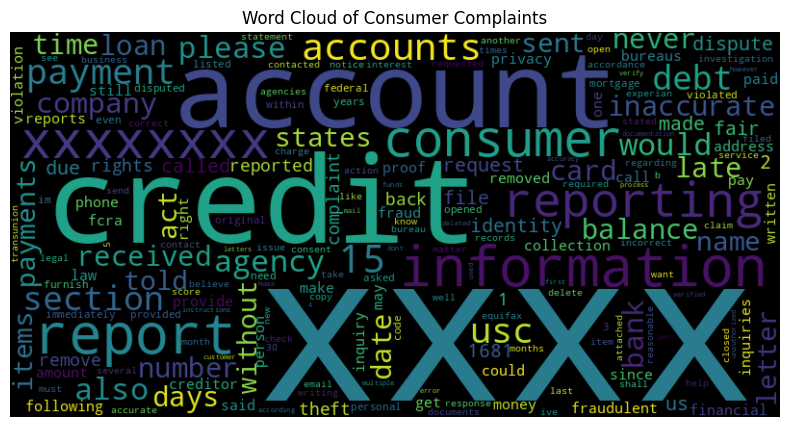

In [9]:


print("Generating word cloud efficiently...")

# Count word frequencies efficiently
word_freq = Counter()
for text in tqdm(df["Clean_Text"], desc="Processing Words for WordCloud"):
    word_freq.update(text.split())

# Generate word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Consumer Complaints")
plt.show()
